In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(pheatmap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
geneSampleBias <- read.table("./Gene_sample_Cluster.txt", header = T, row.names = 1)
#* 进行PCA分析
PCAdata <- geneSampleBias %>% select(c(BiasChangeCount, BiasNCount, stage1, stage2, stage3, stage4, stage5, stage6))
#* 进行主成分分析
pca_result <- prcomp(PCAdata)
head(PCAdata)

,BiasChangeCount,BiasNCount,stage1,stage2,stage3,stage4,stage5,stage6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Ghir_A01G000740-Ghir_D01G000710,159,10,57,64,41,7,2,0
Ghir_A01G000930-Ghir_D01G000900,1,8,19,19,40,70,117,66
Ghir_A01G001190-Ghir_D01G001190,0,234,15,8,9,5,17,52
Ghir_A01G001450-Ghir_D01G001450,66,0,0,1,54,158,60,1
Ghir_A01G001570-Ghir_D01G001570,45,1,8,26,69,102,88,1
Ghir_A01G001580-Ghir_D01G001580,0,14,50,117,94,53,12,0


In [24]:
summary(pca_result)

Importance of components:
                            PC1     PC2     PC3     PC4     PC5      PC6
Standard deviation     100.7607 94.6669 75.4774 61.0076 46.4250 31.72208
Proportion of Variance   0.3147  0.2778  0.1766  0.1154  0.0668  0.03119
Cumulative Proportion    0.3147  0.5925  0.7690  0.8844  0.9512  0.98237
                            PC7       PC8
Standard deviation     23.85199 5.402e-13
Proportion of Variance  0.01763 0.000e+00
Cumulative Proportion   1.00000 1.000e+00

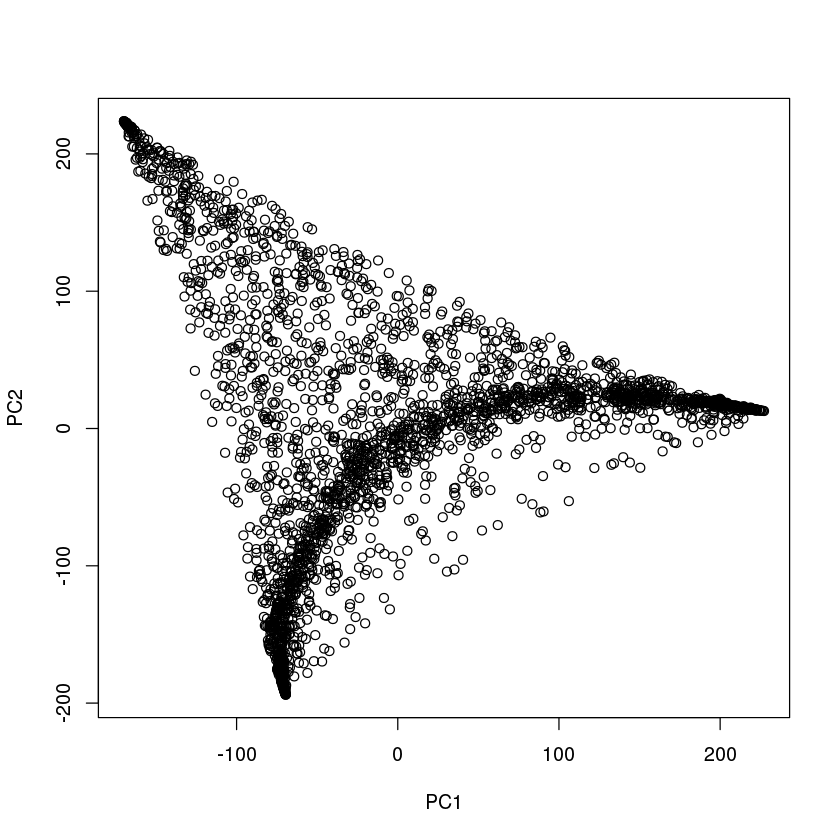

In [16]:
plot(pca_result$x)

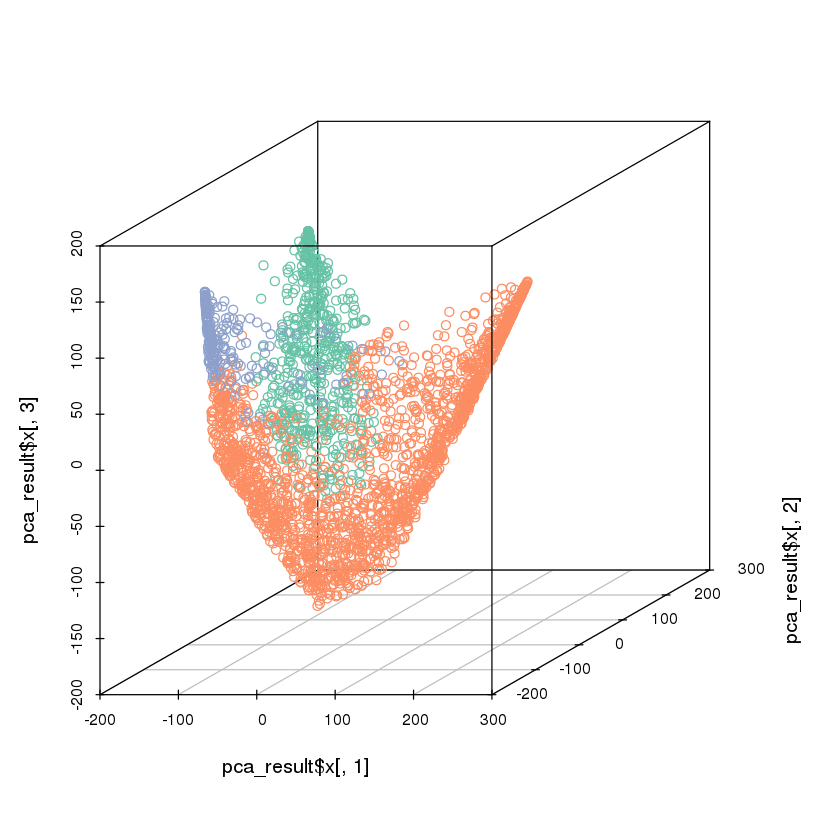

In [17]:
library(scatterplot3d)


my_color <- c("#66C2A5FF", "#FC8D62FF", "#8DA0CBFF")

colors <- my_color[plotData$cluster2]

plotData <- as.data.frame(pca_result$x)
plotData$cluster <- geneSampleBias$cluster
plotData <- plotData[rownames(pca_result$x), ]

dynamicCluster <- plotData %>%
    filter(cluster == "BiasChange") %>%
    mutate(cluster2 = 1)
stableCluster <- plotData %>%
    filter(cluster == "stage6") %>%
    mutate(cluster2 = 3)
middleCluster <- plotData %>%
    filter(cluster %in% c("BiasN", "stage1", "stage2", "stage3", "stage4", "stage5")) %>%
    mutate(cluster2 = 2)
plotData <- rbind(dynamicCluster, middleCluster, stableCluster)
scatterplot3d(pca_result$x[, 1], pca_result$x[, 2], pca_result$x[, 3], color = colors)

png 
  2

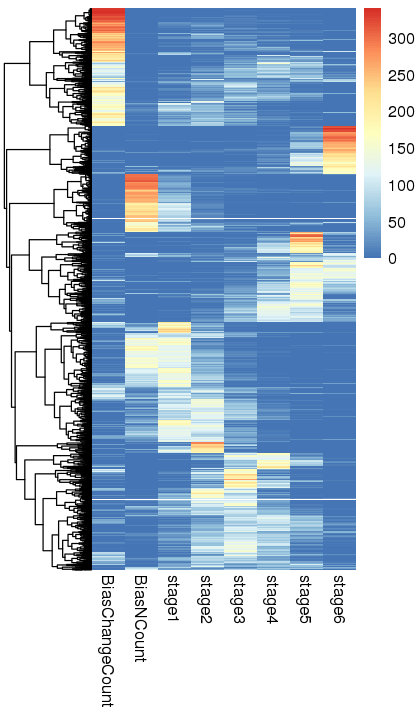

In [3]:
#---------------------------------------------
#* 使用K-means对不同的基因进行聚类
#* 从PCA的结果大致可以看到分为三类或者四类基因
#---------------------------------------------
set.seed(20000)
options(repr.plot.width = 3.5, repr.plot.height = 6) # 调整画布大小
library(pheatmap)
p <- pheatmap(
    PCAdata,
    cluster_rows = T,
    cluster_cols = F,
    show_rownames = F
)
#* 根据距离结果进行分类
# write.table(
#     file = "Gene_sample_Cluster.txt",
#     PCAdata[p$tree_row$order, ],
#     row.names = T, col.names = T, quote = F, sep = "\t"
# )
pdf("./Gene_sample_cluster/gene_sampleCluster_multipleTest.pdf",width = 3,height = 6)
print(p)
dev.off()

png 
  2

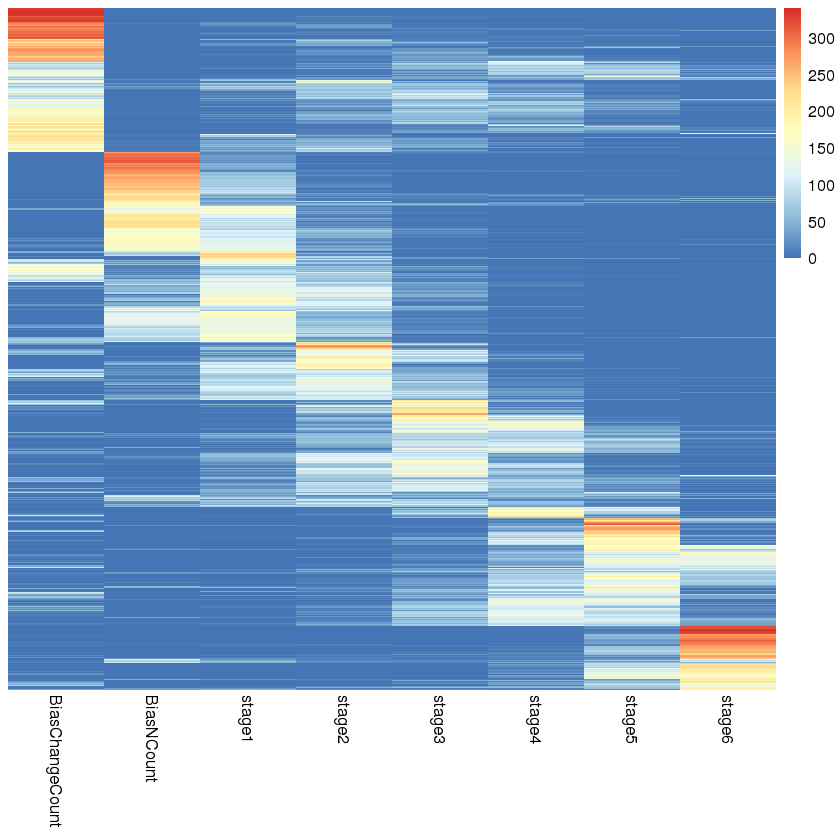

In [8]:
#-----------------------------------------------
# TODO： 根据Bias的样本对基因的Bias模式进行分类
#-----------------------------------------------
# clusterData <- PCAdata[p$tree_row$order, ]
# BiasChangeGene <- clusterData[seq(1, 562), ]
# stage6 <- clusterData[seq(563, 813), ]
# BiasN <- clusterData[seq(814, 1201), ]
# stage5 <- clusterData[seq(1202, 1622), ]
# stage1 <- clusterData[seq(1623, 1976), ]
# stage2 <- clusterData[seq(1977, 2205), ]
# stage4 <- clusterData[seq(2206, 2248), ]
# stage3 <- clusterData[seq(2249, 2666), ]
# plotData2 <- rbind(
#     BiasChangeGene, BiasN, stage1, stage2, stage3, stage4, stage5, stage6
# )
plotData2=read.table("./Gene_sample_Cluster.txt",header=T,row.names = 1)
plotData2=plotData2 %>% select(c(BiasChangeCount,BiasNCount,stage1,stage2,stage3,stage4,stage5,stage6))
p=pheatmap(
    plotData2,
    cluster_rows = F,
    cluster_cols = F,
    show_rownames = F
)
pdf("./Gene_sample_cluster/gene_sampleCluster.pdf",width = 3,height=6)
print(p)
dev.off()

In [77]:
BiasChangeGene$cluster <- "BiasChange"
stage6$cluster <- "stage6"
stage5$cluster <- "stage5"
stage4$cluster <- "stage4"
stage3$cluster <- "stage3"
stage2$cluster <- "stage2"
stage1$cluster <- "stage1"
BiasN$cluster <- "BiasN"
GeneCluster <- rbind(
    BiasChangeGene, BiasN, stage1, stage2, stage3, stage4, stage5, stage6
)
write.table(file = "./Gene_BiasSampleCount.txt", GeneCluster, row.names = T, col.names = T, quote = F, sep = "\t")

In [54]:
library(pheatmap)

In [3]:
#-------------------------------------------------------------
#* 绘制Gene-Pair Bias水平在不同时期间如何变化
#-------------------------------------------------------------
GeneCluster=read.table("./Gene_sample_Cluster.txt",header=T)
BiasLevel=read.table("./All_gene_BiasLevel.txt",header=T,row.names = 1)

In [4]:
#* Bias水平存在改变的基因对
DynamicBiasScore <- BiasLevel[rownames(GeneCluster %>% filter(cluster == "BiasChange")), ]
MiddleBiasScore <- BiasLevel[rownames(GeneCluster %>% filter(
    cluster %in% c("BiasN", "stage1", "stage2", "stage3", "stage4","stage5")
)), ]
StableBiasScore <- BiasLevel[rownames(GeneCluster %>% filter(
    cluster %in% c("stage6")
)), ]

In [12]:
set.seed(2023)

png 
  2

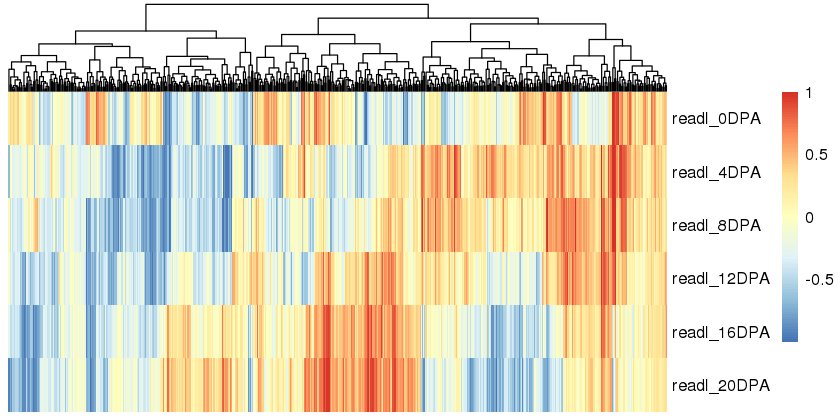

In [14]:
options(repr.plot.width = 7, repr.plot.height = 3.5)
#* 方向改变的这类基因中，基因的Bias水平在不同时期存在显著变化
p=pheatmap(
    t(DynamicBiasScore),
    cluster_rows = F,
    cluster_cols = T,
    show_rownames = T,
    show_colnames = F,
)
pdf("~/V3/switched-BiasGene_multipleTest.pdf",width = 7,height = 3)
print(p)
dev.off()

png 
  2

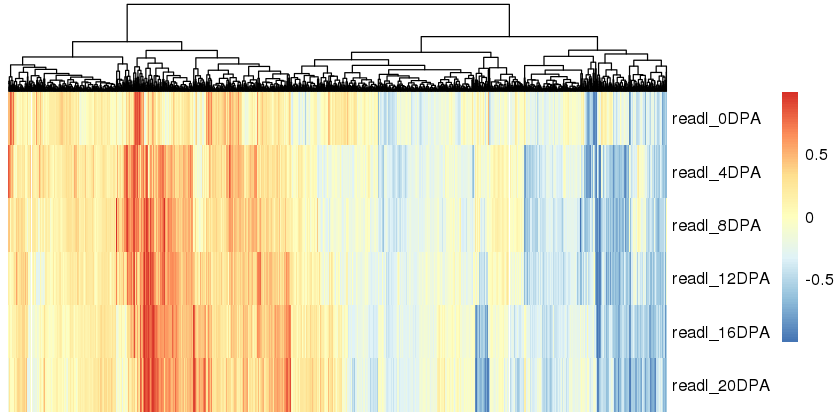

In [15]:
options(repr.plot.width = 7, repr.plot.height = 3.5)
#* 方向改变的这类基因中，基因的Bias水平在不同时期存在显著变化
p=pheatmap(
    t(MiddleBiasScore),
    cluster_rows = F,
    cluster_cols = T,
    show_rownames = T,
    show_colnames = F,
)
pdf("~/V3/time-dependent-BiasGene_multipleTest.pdf",width = 7,height = 3)
print(p)
dev.off()

png 
  2

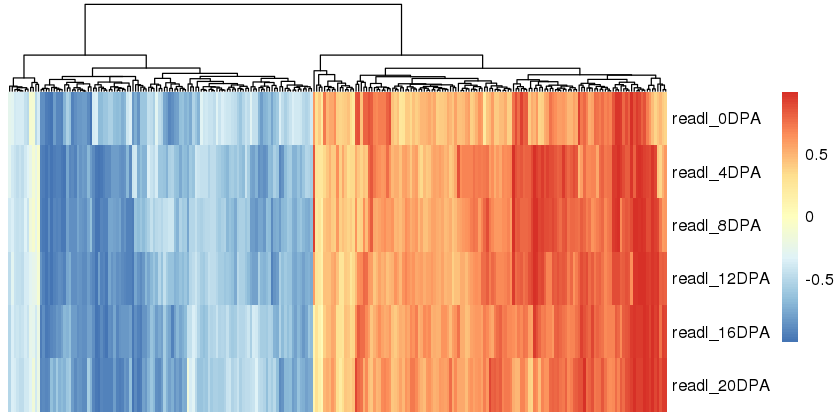

In [10]:
options(repr.plot.width = 7, repr.plot.height = 3.5)
#* 方向改变的这类基因中，基因的Bias水平在不同时期存在显著变化
p <- pheatmap(
    t(StableBiasScore),
    cluster_rows = F,
    cluster_cols = T,
    show_rownames = T,
    show_colnames = F,
)
pdf("~/V3/dominant-BiasGene_multipleTest.pdf", width = 7, height = 3)
print(p)
dev.off()

png 
  2

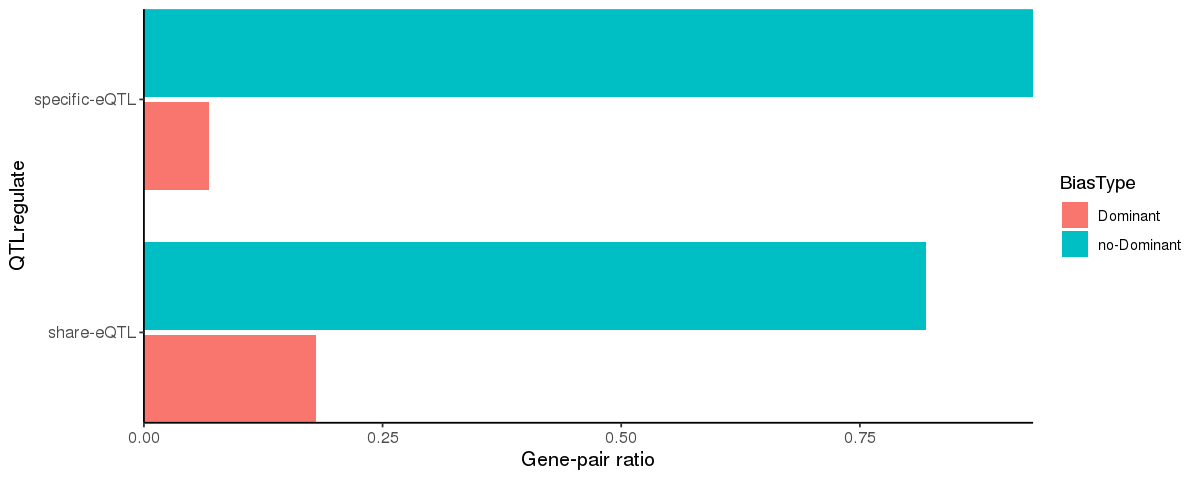

In [128]:
#----------------------------------------------------
#* 时期共享的eQTL中显著性的富集stable Gene-Pair
#* eQTL特异性使用meta分析的结果
#* eQTL的效应使用fastlmm的效应评估结果
#----------------------------------------------------
options(repr.plot.width = 10, repr.plot.height = 4)
plotData <- data.frame(
    QTLregulate = c("share-eQTL", "share-eQTL", "specific-eQTL", "specific-eQTL"),
    BiasType = c("Dominant", "no-Dominant", "Dominant", "no-Dominant"),
    QTLCount = c(206, 935, 171, 2323),
    GeneRatio = c(206 / 1141, 935 / 1141, 171 / 2494, 2323 / 2494)
)
p <- plotData %>% ggplot(aes(x = QTLregulate, y = GeneRatio, fill = BiasType)) +
    geom_bar(stat = "identity", position = position_dodge(0.8), width = 0.75) +
    theme_classic() +
    theme(
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)
    ) +
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    coord_flip() +
    ylab("Gene-pair ratio")
svg("~/V3/QTLShare_BiasDynamic.svg", width = 10, height = 4)
print(p)
dev.off()
p

png 
  2

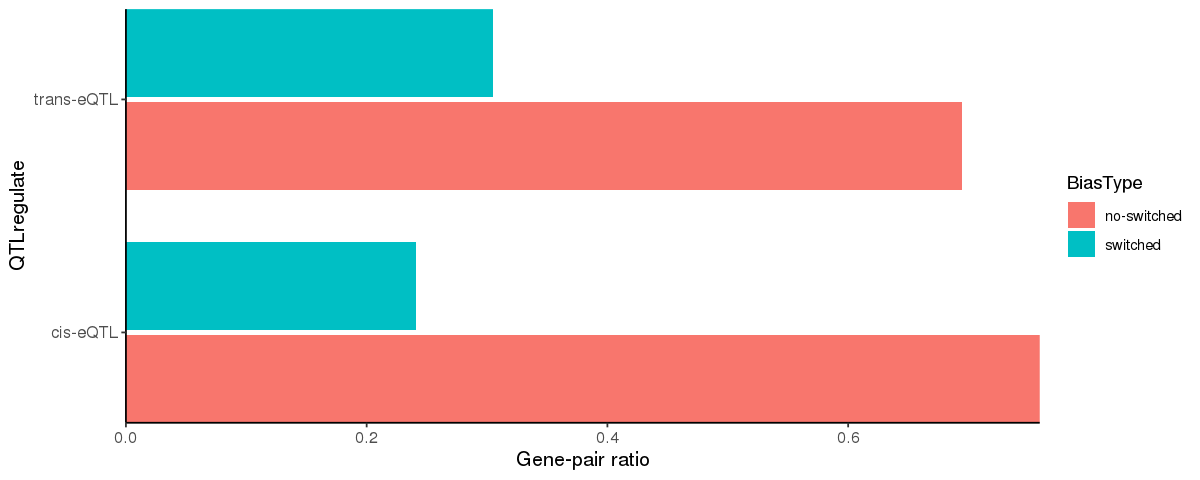

In [130]:
#-----------------------------------------------------
#* 在时期特异性的eQTL中
# ? trans-eQTL所调控的基因存在更高比例的switch gene Bias
#-----------------------------------------------------
options(repr.plot.width = 10, repr.plot.height = 4)
plotData <- data.frame(
    QTLregulate = c("trans-eQTL", "trans-eQTL", "cis-eQTL", "cis-eQTL"),
    BiasType = c("switched", "no-switched", "switched", "no-switched"),
    QTLCount = c(220, 501, 427, 1346),
    GeneRatio = c(220 / 721, 501 / 721, 427 / 1773, 1346 / 1773)
)
p <- plotData %>% ggplot(aes(x = QTLregulate, y = GeneRatio, fill = BiasType)) +
    geom_bar(stat = "identity", position = position_dodge(0.8), width = 0.75) +
    theme_classic() +
    theme(
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10)
    ) +
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    coord_flip() +
    ylab("Gene-pair ratio")
svg("~/V3/cis_trans_BiasDynamic.svg", width = 10, height = 4)
print(p)
dev.off()
p

In [3]:
#-------------------------------------------------------
# TODO: 基因对之间是否存在剂量补偿效应
#* 当一个亚组基因没有表达的时候与两个亚组都表达时；其剂量补偿效应是否存在
#* 理论上不存在剂量补偿时候，At和Dt总表达量是存在很大差异；而剂量补偿效应的存在会使得At和Dt总表达变化比较接近
#-------------------------------------------------------
dosageGene <- read.table("./dosage_expression.txt", header = T, sep = "\t")
filterData=dosageGene %>%
    filter((downRegulationSample > 3) & (normal > 3))

In [9]:
head(filterData)

,genePair,downRegulationSample,normal,downMean,normalMean,stage
,<fct>,<int>,<int>,<dbl>,<dbl>,<int>
1,Ghir_A01G000080-Ghir_D01G000100,250,4,19.159264,22.782175,2
2,Ghir_A01G000330-Ghir_D01G000340,252,7,4.867446,7.620543,6
3,Ghir_A01G000380-Ghir_D01G000380,22,10,3.822750,6.840860,4
4,Ghir_A01G000540-Ghir_D01G000520,6,93,3.095933,36.458459,1
5,Ghir_A01G000650-Ghir_D01G000620,33,7,2.752845,7.302986,4
6,Ghir_A01G000740-Ghir_D01G000710,48,221,3.067742,6.286656,1


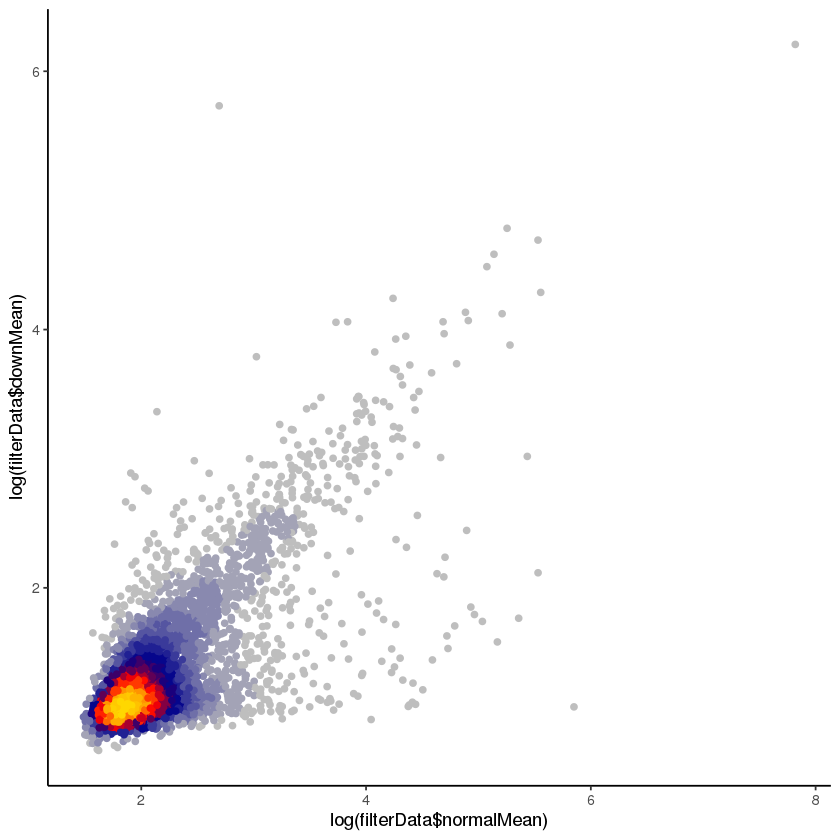

In [4]:
library(LSD)
gg <- heatscatter(
    x = log(filterData$normalMean),
    y = log(filterData$downMean),
    color.contour = "green",
    colpal = "heat", #* 修改热力图颜色显示
    ggplot = TRUE
)


In [5]:
lineData <- data.frame(
    intercept = c(0, 0),
    slope = c(0.5, 1),
    lineType = c("red", "blue")
)
p=gg + geom_abline(
    data = lineData, aes(intercept = intercept, slope = slope),
    linetype = 2
) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 6)) +
    scale_x_continuous(expand = c(0, 0), limits = c(1, 6)) +
    xlab("Total expression of All HomoeologGene") +
    ylab("Total expression of one downregulated") +
    theme(
        axis.title = element_text(size = 16)
    )
# pdf("./eQTL_dosage_expression/gene_dosage.pdf",width=4,height=4)
svg("./eQTL_dosage_expression/gene_dosage.svg",width=4,height=4)
print(p)
dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

In [9]:
#-------------------------------------------------------
#* 两种eQTL调控的基因对中，剂量补偿强弱的比较
#-------------------------------------------------------
filter_eQTL_dosage=read.table("./eQTL_dosage_expression/filter_eQTL_dosage.txt",header=T)
str(filter_eQTL_dosage)

'data.frame':	794 obs. of  13 variables:
 $ genePair            : Factor w/ 359 levels "Ghir_A01G000740-Ghir_D01G000710",..: 1 3 4 6 8 9 14 16 18 19 ...
 $ eGene               : Factor w/ 365 levels "Ghir_A01G000740",..: 1 185 3 187 5 188 7 192 10 194 ...
 $ chrom               : int  1 14 1 14 1 14 21 14 20 14 ...
 $ site                : int  572110 1088370 2552731 3259099 5998404 5399492 33230238 55296022 1450255 58348565 ...
 $ SNPid               : Factor w/ 489 levels "SNP1014080","SNP1019503",..: 141 120 346 123 23 125 254 130 226 133 ...
 $ QTLid               : Factor w/ 317 levels "QTL_1003","QTL_1012",..: 257 21 193 158 289 61 272 268 56 171 ...
 $ QTLType             : Factor w/ 2 levels "Bias_cis","Bias_trans": 1 1 1 1 1 1 2 1 2 1 ...
 $ downRegulationSample: int  48 6 4 115 15 205 36 7 8 7 ...
 $ normal              : int  221 4 22 4 62 71 15 21 323 27 ...
 $ downMean            : num  3.07 3.72 2.9 3.68 2.98 ...
 $ normalMean          : num  6.29 5.05 5.12 6.23 5.72 ...


png 
  2

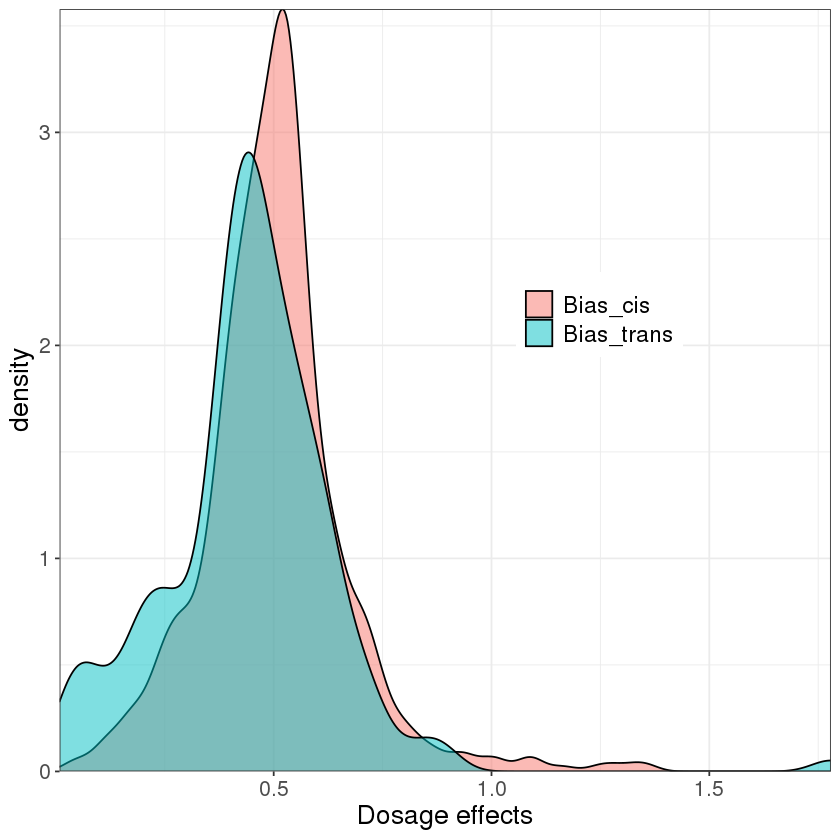

In [11]:
p <- ggplot(filter_eQTL_dosage, aes(x = dosageRatio, fill = QTLType)) +
    geom_density(alpha = .5) +
    theme_bw() +
    scale_x_continuous(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    theme(
        legend.position = c(0.7, 0.6),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 13),
        legend.text = element_text(size = 14),
        legend.title = element_blank()
    ) +
    xlab("Dosage effects")
pdf("./eQTL_dosage_expression/cis_trans_dosage.pdf", width = 4, height = 4)
print(p)
dev.off()
p

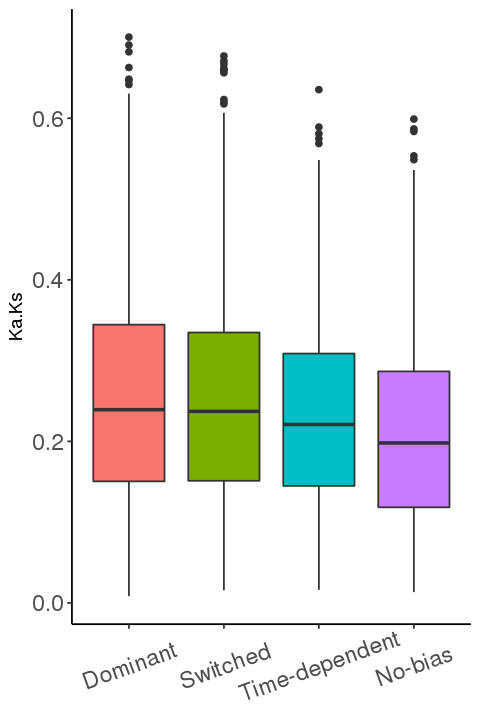

In [5]:
#---------------------------------------------------
# TODO: 基因的差异表达和功能分化之间存在联系
#* Dominant Bias 基因正经历快速的进化
#---------------------------------------------------
options(repr.plot.width = 4, repr.plot.height = 6)
# ka_ks_plotData <- read.table("./WGCAN_cluster/Gene_kaks.txt", header = T)
ka_ks_plotData <- read.table("./WGCAN_cluster/Gene_kaks_module.txt", header = T)

ka_ks_plotData$cluster <- factor(ka_ks_plotData$cluster, levels = c("stable", "dynamic", "middle", "BiasN"))
# head(ka_ks_plotData)
p <- ggplot(ka_ks_plotData, aes(x = cluster, y = Ka.Ks, fill = cluster)) +
    geom_boxplot() +
    theme_classic() +
    theme(
        legend.position = "none",
        axis.title.x = element_blank(),
        axis.text.x = element_text(size = 14, angle = 20, vjust = 0.6),
        axis.text.y = element_text(size = 14)
    ) +
    scale_x_discrete(
        labels = c("Dominant", "Switched", "Time-dependent", "No-bias")
    )
# svg("./WGCAN_cluster/Gene_ka_ks.svg", width = 4, height = 6)
# print(p)
# dev.off()
p

In [12]:
wilcox.test(
    ka_ks_plotData %>% filter(cluster=="stable") %>% pull("Ka.Ks"),
    ka_ks_plotData %>% filter(cluster=="dynamic") %>% pull("Ka.Ks"),
)


	Wilcoxon rank sum test with continuity correction

data:  ka_ks_plotData %>% filter(cluster == "stable") %>% pull("Ka.Ks") and ka_ks_plotData %>% filter(cluster == "dynamic") %>% pull("Ka.Ks")
W = 1697890, p-value = 0.3539
alternative hypothesis: true location shift is not equal to 0


In [2]:
#--------------------------------------------------------------------
#* 绘制WGCAN Cluster的显著性图
#--------------------------------------------------------------------
cluster_enrich <- read.table(
    "./WGCAN_cluster/genePair_enrich.txt",
    header = T, sep = "\t"
)
plotData <- cluster_enrich %>% filter(Cluster %in% c(
    "yellow", "green", "red", "magenta", "brown",
    "pink", "greenyellow"
))
plotData$Cluster <- factor(plotData$Cluster, levels = c(
    "green", "pink","greenyellow", "magenta","yellow", "red", "brown"
))

plotData$ClusterType=factor(
    plotData$ClusterType,levels = c("stable",'middle','dynamic')
) 
str(plotData)

'data.frame':	21 obs. of  6 variables:
 $ Cluster      : Factor w/ 7 levels "green","pink",..: 7 7 7 5 5 5 1 1 1 6 ...
 $ odd          : num  1.532 1.068 0.983 1.672 1.021 ...
 $ pval         : num  0.002 0.42608 0.58711 0.00018 0.50163 ...
 $ moduleCount  : int  1146 1146 1146 1136 1136 1136 990 990 990 946 ...
 $ genePairCount: int  61 19 129 66 18 148 13 43 123 60 ...
 $ ClusterType  : Factor w/ 3 levels "stable","middle",..: 3 1 2 3 1 2 3 1 2 3 ...


In [3]:
head(plotData)

,Cluster,odd,pval,moduleCount,genePairCount,ClusterType
,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
1,brown,1.5319803,0.002002029,1146,61,dynamic
2,brown,1.0684140,0.426082144,1146,19,stable
3,brown,0.9825937,0.587105317,1146,129,middle
4,yellow,1.6721436,0.000180351,1136,66,dynamic
5,yellow,1.0210917,0.501634041,1136,18,stable
6,yellow,1.1372403,0.086674126,1136,148,middle


png 
  2

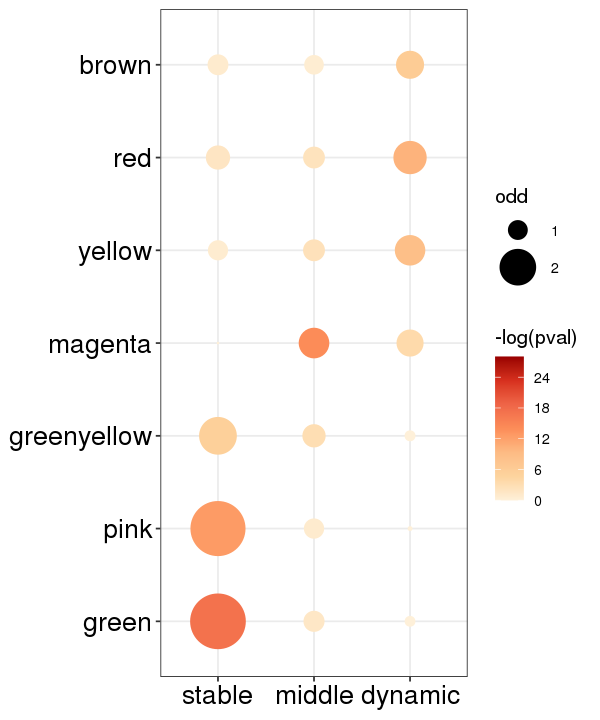

In [11]:
#------------------------------------------------
# TODO: Bias基因在几类module中的富集
#------------------------------------------------
library(RColorBrewer)
options(repr.plot.width = 5, repr.plot.height = 6) # 调整画布大小

p <- plotData %>% ggplot(
    aes(x = ClusterType, y = Cluster, color = -log(pval))
) +
    geom_point(aes(size = odd)) +
    scale_color_gradientn(
        colours = brewer.pal(7, "OrRd"),
        breaks = seq(0, 30, 6), limits = c(0, 28)
    ) +
    scale_size_continuous(
        range = c(0.1,15),
        trans="exp"
    )+
    theme_bw() +
    theme(
        axis.title = element_blank(),
        axis.text = element_text(size = 16, color = "black"),
        legend.title = element_text(size = 12, color = "black"),
    )
svg("WGCAN_cluster/Bias_gene_enrich_WGCAG.svg", width = 5, height = 6)
print(p)
dev.off()
p

In [90]:
#--------------------------------------------------------------
#* 绘制Bias基因显著性的富集到WGCAN module中的Bias趋势图
#* V1使用的Gene是2667中的Gene而不是module内所有的基因
#* V2使用的Gene是module内所有的基因
#--------------------------------------------------------------
Bias_WGCAN_score <- read.table("./WGCAN_cluster/middle_biasLevel_V2.txt", header = T)
#* 对同一个module内的所有的基因求均值
Bias_WGCAN_score <- Bias_WGCAN_score %>%
    group_by(cluster) %>%
    summarise(
        stage_0DPA = mean(X0DPA), stage_4DPA = mean(X4DPA),
        stage_8DPA = mean(X8DPA), stage_12DPA = mean(X12DPA),
        stage_16DPA = mean(X16DPA), stage_20DPA = mean(X20DPA)
    )
plotData <- Bias_WGCAN_score %>% pivot_longer(
    cols = ends_with("DPA"),
    names_to = "Stage",
    values_to = "Score"
)
str(plotData)
plotData$Stage <- factor(plotData$Stage, levels = c(
    "stage_0DPA", "stage_4DPA", "stage_8DPA",
    "stage_12DPA", "stage_16DPA", "stage_20DPA"
))

tibble [6 × 3] (S3: tbl_df/tbl/data.frame)
 $ cluster: Factor w/ 1 level "magenta": 1 1 1 1 1 1
 $ Stage  : chr [1:6] "stage_0DPA" "stage_4DPA" "stage_8DPA" "stage_12DPA" ...
 $ Score  : num [1:6] 0.00145 -0.00864 -0.00528 -0.01442 -0.0139 ...


png 
  2

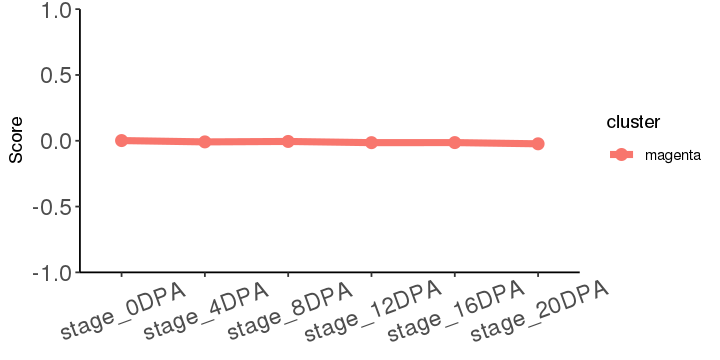

In [91]:
options(repr.plot.width = 6, repr.plot.height = 3)
p <- plotData %>%
    # filter(
    #     cluster %in% c("yellow", "brown", "red")
    # ) %>%
    ggplot(
        aes(x = Stage, y = Score, color = cluster)
    ) +
    geom_point(size = 3) +
    geom_line(aes(group = cluster), size = 2) +
    theme_classic() +
    scale_y_continuous(expand = c(0, 0), limits = c(-1, 1)) +
    scale_x_discrete(expand = c(0.1, 0)) +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle = 20, vjust = 0.6, size = 14),
        axis.text.y = element_text(size = 14)
    )

svg("WGCAN_cluster/middle_WGCAG_V2.svg", width = 6, height = 3)
print(p)
dev.off()
p

In [86]:
Bias_WGCAN_score %>% filter(cluster %in% c("yellow", "red", "brown"))

cluster,stage_0DPA,stage_4DPA,stage_8DPA,stage_12DPA,stage_16DPA,stage_20DPA
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
brown,-0.13567892,-0.4335832,-0.4603189,-0.3523753,-0.2541239,-0.2151911
red,-0.08353214,-0.1161868,-0.1418851,-0.2497660,-0.4340548,-0.5015836
yellow,0.07736240,0.1446849,0.1923098,0.3046219,0.4377023,0.4853031


In [37]:
#-----------------------------------------------------------------
#* 比较module内每个基因的340份材料比例：
# ?1. switched accession ratio
# ?2. Dominant accession ratio
# ?3. time-depdent accession ratio
#-----------------------------------------------------------------
dynamicGene <- read.table("./WGCAN_cluster/dynamic_moduleGene_cluster.txt", header = T, sep = "\t")
middleGene <- read.table("./WGCAN_cluster/middle_moduleGene_cluster.txt", header = T, sep = "\t")
stableGene <- read.table("./WGCAN_cluster/stable_moduleGene_cluster.txt", header = T, sep = "\t")
#* 每个基因Cluster的统计
dynamicCluster <- read.table("./WGCAN_cluster/dynamic_biasLevel_V2.txt", header = T, sep = "\t")
middleCluster <- read.table("./WGCAN_cluster/middle_biasLevel_V2.txt", header = T, sep = "\t")
stableCluster <- read.table("./WGCAN_cluster/stable_biasLevel_V2.txt", header = T, sep = "\t")


dynamicGene$geneType <- "switched"
middleGene$geneType <- "time-dependent"
stableGene$geneType <- "dominant"

dynamicGene$cluster <- dynamicCluster$cluster
middleGene$cluster <- middleCluster$cluster
stableGene$cluster <- stableCluster$cluster



plotData <- rbind(dynamicGene, middleGene, stableGene)
plotData <- plotData %>% mutate(timeCount = BiasNCount + stage1 + stage2 + stage3 + stage4 + stage5)
head(plotData)

,genePair,BiasChangeCount,NoChangeCount,BiasNCount,stage1,stage2,stage3,stage4,stage5,stage6,geneType,cluster,timeCount
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<fct>,<int>
1,Ghir_A01G000080-Ghir_D01G000100,163,177,0,0,0,0,1,148,28,switched,brown,149
2,Ghir_A01G000330-Ghir_D01G000340,99,241,0,0,0,2,13,222,4,switched,yellow,237
3,Ghir_A01G000430-Ghir_D01G000430,95,245,20,69,86,45,23,2,0,switched,brown,245
4,Ghir_A01G000650-Ghir_D01G000620,27,313,0,0,31,118,147,17,0,switched,red,313
5,Ghir_A01G000760-Ghir_D01G000730,6,334,0,0,0,0,11,251,72,switched,brown,262
6,Ghir_A01G000790-Ghir_D01G000760,0,340,2,26,88,118,86,20,0,switched,red,340


In [30]:
plotData %>% group_by(geneType) %>% summarise(mean(BiasChangeCount))


geneType,mean(BiasChangeCount)
<chr>,<dbl>
dominant,22.31507
switched,70.71344
time-dependent,63.97674


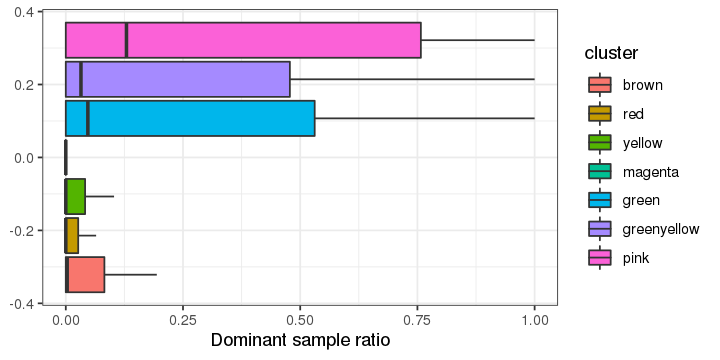

In [39]:
#---------------------------------------------
#* 统计module基因包含对应类型的材料数目
# ? 6个时期都向同一个方向的样本
#---------------------------------------------
options(repr.plot.width = 6, repr.plot.height = 3)
plotData %>%
    select(c(geneType, stage6, cluster)) %>%
    ggplot(
        aes(x = stage6 / 340, fill = cluster)
    ) +
    geom_boxplot(outlier.color = NA) +
    theme_bw()+
    xlab("Dominant sample ratio")

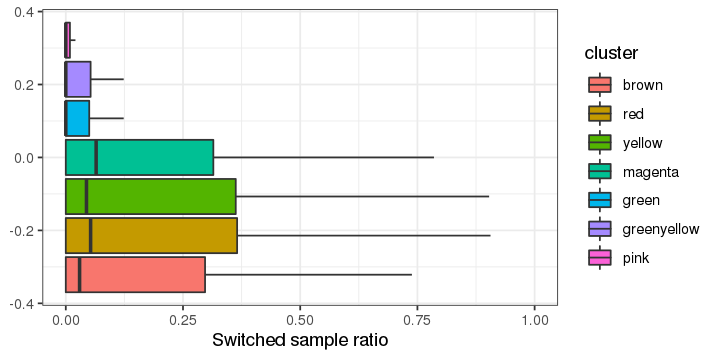

In [40]:
#---------------------------------------------
#* 统计module基因包含对应类型的材料数目
# ? 方向改变的样本占比
#---------------------------------------------
options(repr.plot.width = 6, repr.plot.height = 3)
plotData %>%
    select(c(geneType, BiasChangeCount, cluster)) %>%
    ggplot(
        aes(x = BiasChangeCount / 340, fill = cluster)
    ) +
    geom_boxplot(outlier.color = NA) +
    theme_bw()+
    xlab("Switched sample ratio")

In [38]:

wilcox.test(
    plotData %>% filter(geneType == "time-dependent") %>% pull(BiasChangeCount),
    plotData %>% filter(geneType == "switched") %>% pull(BiasChangeCount)
)


	Wilcoxon rank sum test with continuity correction

data:  plotData %>% filter(geneType == "time-dependent") %>% pull(BiasChangeCount) and plotData %>% filter(geneType == "switched") %>% pull(BiasChangeCount)
W = 1068000, p-value = 0.2911
alternative hypothesis: true location shift is not equal to 0


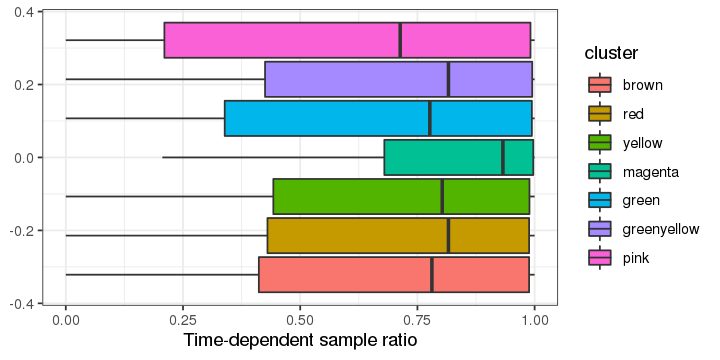

In [41]:
#---------------------------------------------
#* 统计module基因包含对应类型的材料数目
# ? 时期依赖性的样本占比
#---------------------------------------------
options(repr.plot.width = 6, repr.plot.height = 3)
plotData %>%
    select(c(geneType, timeCount, cluster)) %>%
    ggplot(
        aes(x = timeCount / 340, fill = cluster)
    ) +
    geom_boxplot(outlier.color = NA) +
    theme_bw()+
    xlab("Time-dependent sample ratio")

In [54]:
str(plotData)

'data.frame':	6155 obs. of  13 variables:
 $ genePair       : Factor w/ 6155 levels "Ghir_A01G000080-Ghir_D01G000100",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ BiasChangeCount: int  163 99 95 27 6 0 165 185 281 12 ...
 $ NoChangeCount  : int  177 241 245 313 334 340 175 155 59 328 ...
 $ BiasNCount     : int  0 0 20 0 0 2 0 0 0 140 ...
 $ stage1         : int  0 0 69 0 0 26 2 0 0 118 ...
 $ stage2         : int  0 0 86 31 0 88 15 20 1 25 ...
 $ stage3         : int  0 2 45 118 0 118 29 77 9 8 ...
 $ stage4         : int  1 13 23 147 11 86 67 48 19 3 ...
 $ stage5         : int  148 222 2 17 251 20 50 10 23 7 ...
 $ stage6         : int  28 4 0 0 72 0 12 0 7 27 ...
 $ geneType       : chr  "switched" "switched" "switched" "switched" ...
 $ cluster        : Factor w/ 7 levels "brown","red",..: 1 3 1 2 1 2 3 1 3 1 ...
 $ timeCount      : int  149 237 245 313 262 340 163 155 52 301 ...


In [3]:
#----------------------------------------------------------------
#* 根据edges的数量进行rank,分成10份基因
#* 统计每个种类型基因对，其cis区域SNP的数目
# TODO: 高连通度基因是否存在更少的核苷酸变异
#----------------------------------------------------------------
All_genePair_edge <- read.table("./WGCAN_cluster/All_gene_edgeCount.txt", header = T, sep = "\t")
#* 分成10个柱子
All_genePair_edge$rank <- rank(All_genePair_edge$edgeCount) / dim(All_genePair_edge)[1]
All_genePair_edge <- All_genePair_edge %>% mutate(rank = trunc(100 * rank))
write.table(All_genePair_edge,
file = "./WGCAN_cluster/edge_rank/All_gene_edgeRank.txt",
row.names = F,col.names = T,quote = F,sep="\t"
)

In [34]:
#----------------------------------------
#* 分rank的数据
#----------------------------------------
plotData <- read.table("./WGCAN_cluster/edge_rank/scale_SNPCount_rank1.txt", header = T)
for (i in seq(2, 3, 1)) {
    tmpData <- read.table(
        paste("./WGCAN_cluster/edge_rank/scale_SNPCount_rank", i, ".txt", sep = ""),
        header = T
    )
    plotData <- rbind(plotData, tmpData)
}

#——-------------------------------------------
#* 分cluster的基因
#——-------------------------------------------
dynamic=read.table("./WGCAN_cluster/edge_rank/scale_SNPCount_dynamic.txt", header = T)
noeGene=read.table("./WGCAN_cluster/edge_rank/scale_SNPCount_NoeGene.txt", header = T)
stable=read.table("./WGCAN_cluster/edge_rank/scale_SNPCount_stable.txt", header = T)
middle=read.table("./WGCAN_cluster/edge_rank/scale_SNPCount_middle.txt", header = T)

plotData=rbind(
    dynamic,noeGene,stable,middle
)

head(plotData)

,scaleSNPCount,windowId,rank
,<dbl>,<int>,<fct>
1,1.393517,1,dynamic
2,1.400162,2,dynamic
3,1.402917,3,dynamic
4,1.405511,4,dynamic
5,1.418639,5,dynamic
6,1.410859,6,dynamic


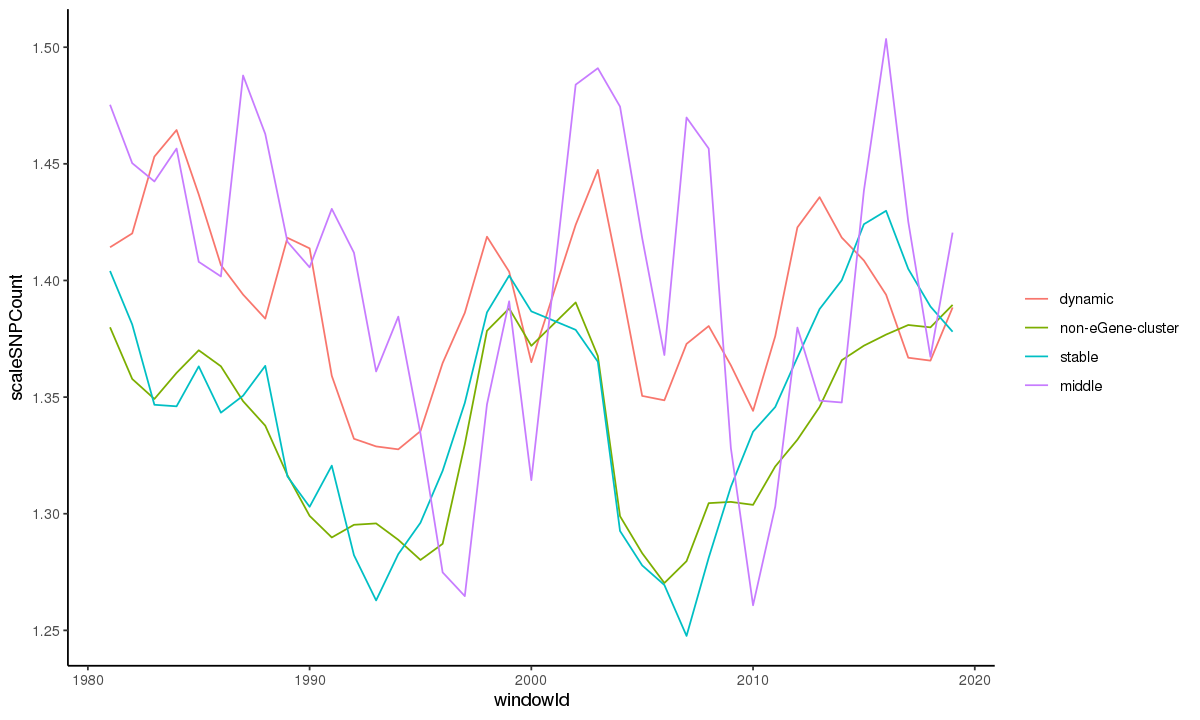

In [35]:
options(repr.plot.width = 10, repr.plot.height = 6)
#* 不同rankgene Pair的图
plotData %>%
    filter(windowId>1980 & windowId <2020 & windowId!=2001 ) %>%
    ggplot(aes(x = windowId, y = scaleSNPCount,group=as.factor(rank),color=as.factor(rank))) +
    geom_line()+
    theme_classic()+
    theme(  
        legend.title = element_blank()
    )

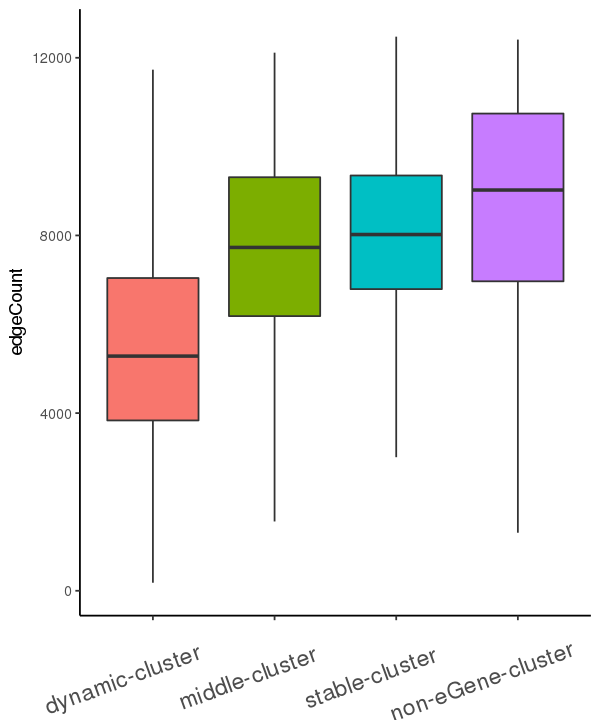

In [36]:
#-----------------------------------------------------
#* 不同类型基因对，其在共表达网络中连接度的统计
#* Dynamic-eGene 富集的Cluster
#-----------------------------------------------------
options(repr.plot.width = 5, repr.plot.height = 6)
plotData <- read.table("WGCAN_cluster/All_gene_edgeCount.txt", header = T)
plotData$GeneType <- factor(plotData$GeneType, levels = c(
    "dynamic-cluster", "middle-cluster", "stable-cluster", "non-eGene-cluster"
))

plotData %>% ggplot(aes(x = GeneType, y = edgeCount, fill = GeneType)) +
    geom_boxplot(outlier.colour = NA) +
    theme_classic()+
    theme(
        legend.position = "none",
        axis.text.x = element_text(size=14,angle = 20,vjust = 0.5,hjust = 0.7),
        axis.title.x = element_blank()
    )

png 
  2

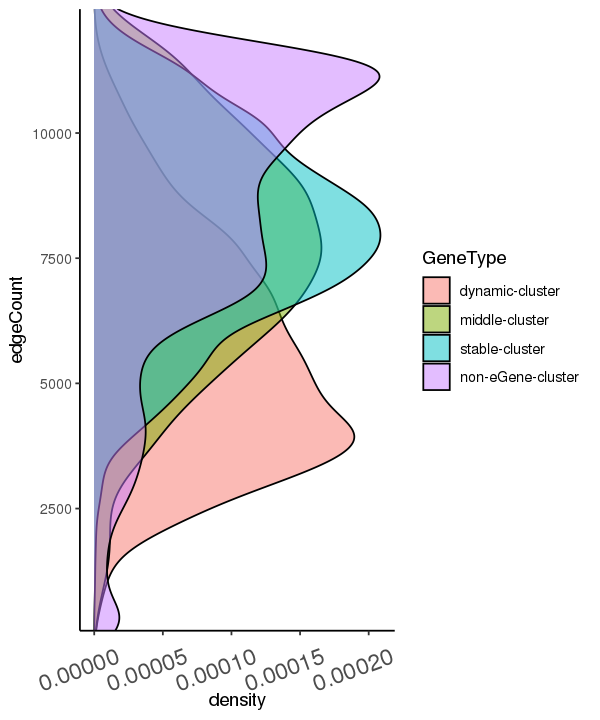

In [4]:
#-----------------------------------------------------
#* 不同类型基因对，其在共表达网络中连接度的统计
#* Dynamic-eGene 富集的Cluster
#-----------------------------------------------------
options(repr.plot.width = 5, repr.plot.height = 6)
plotData <- read.table("WGCAN_cluster/All_gene_edgeCount.txt", header = T)
plotData$GeneType <- factor(plotData$GeneType, levels = c(
    "dynamic-cluster", "middle-cluster", "stable-cluster", "non-eGene-cluster"
))

p <- plotData %>% ggplot(aes(y = edgeCount, fill = GeneType)) +
    geom_density(alpha = 0.5) +
    theme_classic() +
    theme(
        # legend.position = "none",
        axis.text.x = element_text(size = 14, angle = 20, vjust = 0.5, hjust = 0.7)
    ) +
    scale_x_continuous(expand = c(0.05, 0)) +
    scale_y_continuous(expand = c(0, 0))

svg("./WGCAN_cluster/clusterGene_edges.svg", width = 5, height = 6)
print(p)
dev.off()
p

In [2]:
#---------------------------------------------------------------
#* Bias 水平的变异在两个维度上的解释率
# ! time维度，sample维度
#---------------------------------------------------------------
BiasLevel_decomposition <- read.table("./../All_Homoeolog_Bias_level_decomposition.txt", header = T, sep = "\t")
BiasLevel_decomposition <- BiasLevel_decomposition %>% filter(time_low != "error")
BiasLevel_decomposition$time_low <- as.numeric(as.character(BiasLevel_decomposition$time_low))
BiasLevel_decomposition$time_mean <- as.numeric(as.character(BiasLevel_decomposition$time_mean))
BiasLevel_decomposition$time_high <- as.numeric(as.character(BiasLevel_decomposition$time_high))
BiasLevel_decomposition$sample_low <- as.numeric(as.character(BiasLevel_decomposition$sample_low))
BiasLevel_decomposition$sample_mean <- as.numeric(as.character(BiasLevel_decomposition$sample_mean))
BiasLevel_decomposition$sample_high <- as.numeric(as.character(BiasLevel_decomposition$sample_high))
#* 不同类别的基因对
plotData <- read.table("WGCAN_cluster/All_gene_edgeCount.txt", header = T)
NoeGene=plotData %>% filter(GeneType=="non-eGene-cluster")
Time=plotData %>% filter(GeneType=="middle-cluster")
Stable=plotData %>% filter(GeneType=="stable-cluster")
Dynamic=plotData %>% filter(GeneType=="dynamic-cluster")

NoeGene=BiasLevel_decomposition %>% filter(genePair %in% NoeGene$genePair)
Time=BiasLevel_decomposition %>% filter(genePair %in% Time$genePair)
Stable=BiasLevel_decomposition %>% filter(genePair %in% Stable$genePair)
Dynamic=BiasLevel_decomposition %>% filter(genePair %in% Dynamic$genePair)

In [15]:
order_sampleData <- function(Variant_decomp) {
    geneId <- seq(0, dim(Variant_decomp)[1] - 1) / dim(Variant_decomp)[1]
    # !按照解释率的高低进行排序
    timerOrder <- order(Variant_decomp[, 3], decreasing = T)
    sampleOrder <- order(Variant_decomp[, 6], decreasing = T)

    timeVariant <- Variant_decomp[timerOrder, ]
    timeVariant$order <- geneId

    sampleVariant <- Variant_decomp[sampleOrder, ]
    sampleVariant$order <- geneId
    return(list(
        time = timeVariant,
        sample = sampleVariant
    ))
}

In [16]:
#* 排序后的结果
NoeGene=order_sampleData(NoeGene)
Time=order_sampleData(Time)
Stable=order_sampleData(Stable)
Dynamic=order_sampleData(Dynamic)

In [24]:
head(Dynamic$sample)

,genePair,time_low,time_mean,time_high,sample_low,sample_mean,sample_high,order,Cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1588,Ghir_A07G018750-Ghir_D07G019100,0.00000000,0.0006626211,0.001713989,0.8077706,0.8767745,0.9401280,0.0000000000,1
2533,Ghir_A11G015220-Ghir_D11G015300,0.00342713,0.0064572851,0.011368781,0.8098320,0.8425380,0.8728135,0.0003100775,1
1322,Ghir_A06G014150-Ghir_D06G014920,0.01867517,0.0245853606,0.031779549,0.8042463,0.8317012,0.8586274,0.0006201550,1
1497,Ghir_A07G008270-Ghir_D07G008380,0.02328844,0.0297053992,0.035939869,0.7953554,0.8147560,0.8339045,0.0009302326,1
714,Ghir_A04G015190-Ghir_D04G019910,0.01522913,0.0204474876,0.026116898,0.7900656,0.8097716,0.8273614,0.0012403101,1
626,Ghir_A04G003230-Ghir_D05G036290,0.00684661,0.0109603316,0.016488006,0.7711836,0.8018907,0.8307410,0.0015503876,1


In [29]:
#----------------------------------------
#* 合并两个cluste的图
#----------------------------------------
Dynamic$time$Cluster <- 1
Stable$time$Cluster <- 2
Time$time$Cluster <- 3
NoeGene$time$Cluster <- 4
MergeData <- rbind(Dynamic$time, Stable$time,Time$time,NoeGene$time)
MergeData$Cluster <- as.factor(MergeData$Cluster)
str(MergeData)

'data.frame':	15595 obs. of  9 variables:
 $ genePair   : Factor w/ 18338 levels "Ghir_A01G000040-Ghir_D01G000060",..: 4719 1564 1810 16112 11444 4341 62 12798 103 7086 ...
 $ time_low   : num  0.986 0.985 0.985 0.974 0.981 ...
 $ time_mean  : num  0.987 0.987 0.987 0.984 0.983 ...
 $ time_high  : num  0.989 0.989 0.988 0.992 0.984 ...
 $ sample_low : num  2.09e-03 1.56e-03 1.72e-03 2.16e-05 2.74e-03 ...
 $ sample_mean: num  0.0027 0.00218 0.00242 0.00264 0.00348 ...
 $ sample_high: num  0.00337 0.00295 0.00343 0.00674 0.00449 ...
 $ order      : num  0 0.00031 0.00062 0.00093 0.00124 ...
 $ Cluster    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...


In [92]:
#----------------------------------------
#* 合并两个cluste的图
#----------------------------------------
Dynamic$sample$Cluster <- 1
Stable$sample$Cluster <- 2
Time$sample$Cluster <- 3
NoeGene$sample$Cluster <- 4
MergeData <- rbind(Dynamic$sample, Stable$sample,Time$sample,NoeGene$sample)
MergeData$Cluster <- as.factor(MergeData$Cluster)
str(MergeData)

'data.frame':	15595 obs. of  9 variables:
 $ genePair   : Factor w/ 18338 levels "Ghir_A01G000040-Ghir_D01G000060",..: 8998 14368 7481 8458 4201 3618 3948 2715 217 2026 ...
 $ time_low   : num  0 0.00343 0.01868 0.02329 0.01523 ...
 $ time_mean  : num  0.000663 0.006457 0.024585 0.029705 0.020447 ...
 $ time_high  : num  0.00171 0.01137 0.03178 0.03594 0.02612 ...
 $ sample_low : num  0.808 0.81 0.804 0.795 0.79 ...
 $ sample_mean: num  0.877 0.843 0.832 0.815 0.81 ...
 $ sample_high: num  0.94 0.873 0.859 0.834 0.827 ...
 $ order      : num  0 0.00031 0.00062 0.00093 0.00124 ...
 $ Cluster    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...


png 
  2

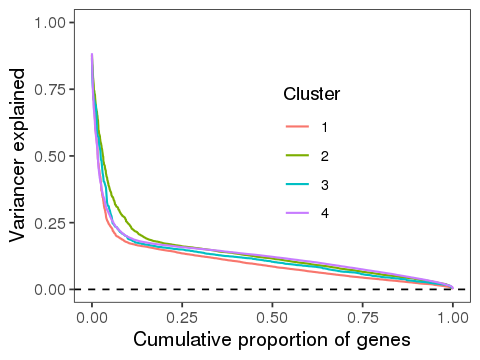

In [96]:
library(ggplot2)
options(repr.plot.width = 4, repr.plot.height = 3) # 调整画布大小
p <- ggplot(MergeData, aes(x = order)) +
  # geom_ribbon(aes(ymin = time_low, ymax = time_high, group = Cluster, color = Cluster), fill = "white") +
  geom_line(aes(y = sample_mean, group = Cluster, color = Cluster), size = 0.6) +
  theme_bw() +
  theme(
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 12),
    legend.position = c(0.6,0.5)
  ) +
  geom_hline(yintercept = 0, color = "black", linetype = "dashed") +
  scale_y_continuous(limits = c(0, 1)) +
  # scale_x_continuous(labels = c('0 DPA','4 DPA' ,'8 DPA' ,'12 DPA','16 DPA','20 DPA'))+
  ylab("Variancer explained") +
  xlab("Cumulative proportion of genes")
pdf("WGCAN_cluster/Cluster_enrich_Bias_decomposition_sample.pdf",width=4,height=3)
print(p)
dev.off()
p

In [33]:
#---------------------------------------------
#TODO: 鉴定到的三类基因簇中eQTL数目的含量
#---------------------------------------------
AllGenePair=read.table("WGCAN_cluster/All_gene_edgeCount.txt",header=T,sep="\t")

In [74]:
dynamicGene=AllGenePair %>% filter(GeneType=="dynamic-cluster") %>% count(QTLCount)
# dynamicGene[7,2]=dynamicGene %>% filter(QTLCount>=6) %>% select(n) %>% sum()
Other=AllGenePair %>% filter(GeneType!="dynamic-cluster") %>% count(QTLCount)
# Other[7,2]=Other %>% filter(QTLCount>=6) %>% select(n) %>% sum()
#* 计算得到的比例
Other=Other %>% mutate(geneRatio=n/12379,gene='Other')
dynamicGene=dynamicGene %>% mutate(geneRatio=n/3228,gene='Switch') 
dynamicGene=dynamicGene[2:7,]
Other=Other[2:7,]
plotData=rbind(
    dynamicGene[2:7,],
    Other[2:7,]
)
head(dynamicGene)

,QTLCount,n,geneRatio,gene
,<int>,<int>,<dbl>,<chr>
2,1,574,0.17781908,Switch
3,2,532,0.16480793,Switch
4,3,410,0.12701363,Switch
5,4,269,0.08333333,Switch
6,5,211,0.06536555,Switch
7,6,137,0.04244114,Switch


png 
  2

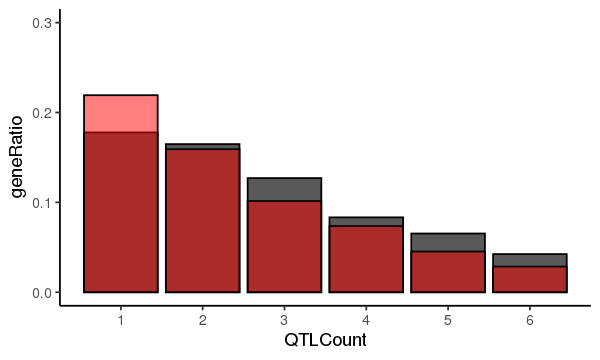

In [90]:
options(repr.plot.width = 5, repr.plot.height = 3) 
p= ggplot(
   dynamicGene,aes(x=QTLCount,y=geneRatio)
    )+geom_bar(
        stat='identity',
        color='black'
        
        )+
    geom_bar(
        data=Other,inherit.aes = F,
        aes(x=QTLCount,y=geneRatio),
        fill='red',
        stat='identity',
        color='black',
        alpha=0.5
    )+
    theme_classic()+
    scale_y_continuous(
        limits=c(0,0.3)
    )+
    scale_x_continuous(
        breaks=seq(1,6),
        labels=seq(1,6)
    )

pdf("WGCAN_cluster/SwitchedGene_QTLCount.pdf",width = 5,height=3)
print(p)
dev.off()
p